In [1]:
import matplotlib.image as mpimg 
import numpy as np
import time
import matplotlib.pyplot as plt
from itertools import islice

def read_image(image_name):
    """
    Read image 
 
    Inputs:
    ----------------
        image_name   Image path 
 
    Output:
    ----------------
        img  Image as multi channel array
       """      
    img = mpimg.imread(image_name)
    #im_array = np.array(img)

    return img


#function that finds the largest element and its index in an array
def find_best_match(score):
    """
    Find max value in 2D array and its index
 
    Inputs:
    ----------------
        score   2D target array
        
    Output:
    ----------------
        index   Index of largest element 
        
        max_element Max Element in the array

     """      
    #try:
    max_element = np.amax(score)
    #except:
    #    print( "Line 45 Error", score )
    index = np.unravel_index(np.argmax( score, axis=None), score.shape) 
    #index = np.argmax(score)

    return index, max_element # tuple = list, int


def matrix_fft(pattern):
    """
    FFT of the input array
 
    Inputs:
    ----------------
        pattern   2D array
        
    Output:
    ----------------
        fft2   FFT of array

     """
    #Take FFt along columns, then rows       
    fft1 = np.fft.fft(pattern, axis = 0)
    fft2 = np.fft.fft(fft1, axis = 1)

    return fft2

def matrix_ifft(pattern):
    """
    IFFT of the input array
 
    Inputs:
    ----------------
        pattern   2D array
        
    Output:
    ----------------
        ifft2   FFT of array

     """  

    #Take IFFt along columns, then rows    
    ifft1 = np.fft.ifft(pattern, axis = 0)
    ifft2 = np.fft.ifft(ifft1, axis = 1)

    return ifft2


def matrix_complex_conj(pattern):
    """
    Complex of the input array
 
    Inputs:
    ----------------
        pattern   2D array
        
    Output:
    ----------------
        pattern_fft_conj   Complex conjugate of array

     """  

    pattern_fft_conj = np.conj(pattern)

    return pattern_fft_conj 



def zero_padding(C, x_pad, y_pad):
    """
    Zero pad 2D array by placing it in centre of zeroed matrix of padded size.
 
    Inputs:
    ----------------
        array   The array to pad
 
        padlen_x    Padwidth of the rows. Floats will be rounded up.
        
        padlen_y    Padwidth of the columns. Floats will be rounded up.
 
    Output:
    ----------------
        padded  Padded template array.  
     """        

    # m,n = C.shape
    
    # #needs to be int to work not float make this into a round up if float function or find libray function 
    # if x_pad% 2 == 0:
    #     x_pad = int(x_pad)
    # else: 
    #     x_pad = int( x_pad + 0.5 )

    # if y_pad% 2 == 0:
    #     y_pad = int(y_pad)
    # else: 
    #     y_pad = int( y_pad + 0.5 )
           
    # c_y = np.zeros((m +2*x_pad , n+2*y_pad ),dtype=C.dtype)
    # c_y[x_pad:-x_pad:, y_pad:-y_pad] = C
    # return c_y
    
    
    x_pad = int(np.round(x_pad))
    y_pad = int(np.round(y_pad))
    
    return np.pad(C, [(x_pad, ), (y_pad, )], mode='constant')


# def nextpow2(n):

#     """get the next power of 2 that's greater than n"""
#     m_f = np.log2(n)
#     m_i = np.ceil(m_f)

#     return 2**m_i


def crr_2d( pattern, template):
    """
    Cross correlation of two 2D arrays using FFt to convolve spatial arrays
 
    Inputs:
    ----------------
        pattern   Pattern must be non empty 

        template   Template, search space with similar dimensionality to pattern
        
    Output:
    ----------------
        real_corr  Cross correlation array
     """  

    # '''New padding'''
#     a = pattern
#     b= template

#     min_height_pad = max(a.shape[0], b.shape[0])
#     min_width_pad = max(a.shape[1], b.shape[1]) 
#     # find closes power of 2 for height and width (np.fft runs faster) 
#     optimal_width = nextpow2(2*min_width_pad) 
#     optimal_height = nextpow2(2*min_height_pad) 

#     print("min and optimal ")
#     print(min_height_pad, min_width_pad) 
#     print(optimal_width, optimal_height)

#     height_pad_p = optimal_height - a.shape[0]
#     width_pad_p = optimal_width - a.shape[1]
#     height_pad_t = optimal_height - b.shape[0] 
#     width_pad_t = optimal_width - b.shape[1] 

# #     a_padded = zero_padding( a, height_pad_p /2, width_pad_p /2 ) 
# #     b_padded = zero_padding( b, height_pad_t /2, width_pad_t /2 )

#     # pad pattern as centre of array with zeros
#     pattern_padded = zero_padding( a, height_pad_p /2, width_pad_p /2 ) 
#     template_padded = zero_padding( b, height_pad_t /2, width_pad_t /2  )


    # '''New padding'''
    # # get minimum width/height to pad for np.fft 
    # min_width_pad = max( pattern.shape[1], template.shape[1]) 
    # min_height_pad = max(pattern.shape[0], template.shape[0])
    # # find closes power of 2 for height and width (np.fft runs faster) 
    # optimal_width = nextpow2(min_width_pad) 
    # optimal_height = nextpow2(min_height_pad) 

    # # move into zero padding function
    # width_pad_p = optimal_width - pattern.shape[0] 
    # height_pad_p = optimal_height - pattern.shape[1]

    # width_pad_t = optimal_width - template.shape[0] 
    # height_pad_t = optimal_height - template.shape[1] 

    # # pad pattern as centre of array with zeros
    # pattern_padded = zero_padding( pattern, width_pad_p /2, height_pad_p /2 ) 
    # template_padded = zero_padding( template, width_pad_t /2, height_pad_t /2 )

    # template_fft = matrix_fft(template) #(a)
    # pattern_fft_conj = matrix_complex_conj( matrix_fft(pattern_padded) ) # (b)

    # # a * b
    # #Offset pattern due to padding
    # product = pattern_fft_conj[0: pattern_fft_conj.shape [0], 0: pattern_fft_conj.shape [1]] *  template   

    '''Old padding'''
    side_edge_pad = template.shape[0] - pattern.shape[0] # move into zero padding function
    bottom_edge_pad = template.shape[1] - pattern.shape[1]

    pattern_padded = zero_padding( pattern, side_edge_pad /2, bottom_edge_pad /2 ) # pad pattern as centre of array with zeros

    template_fft = matrix_fft(template) #(a)
    pattern_fft_conj = matrix_complex_conj( matrix_fft(pattern_padded) ) # (b)

    # a * b
    #Offset pattern due to padding
    product = pattern_fft_conj[0: pattern_fft_conj.shape [0], 0: pattern_fft_conj.shape [1] ] *  template      
        
    ccr = matrix_ifft(product)
    
    real_corr = np.real(ccr) #np.real

    # return real_corr, height_pad_t, width_pad_t
    return real_corr



def find_offset(pattern, template): 
    """
    2D array offset index and value from cross correlation 
 
    Inputs:
    ----------------
        pattern   Pattern must be non empty 

        template   Template, search space with similar dimensionality to pattern
        
    Output:
    ----------------
        (best_score, best_match)  Index of offset found from cross correlation
     """     

    '''
    new resizing for odd sides
    '''
    extra_row = 0
    extra_col = 0
    a = pattern
    b = template
    if a.shape[0]%2!=0:
    #     w = a.shape[1]
    #     h = a.shape[0]
    #     #a= np.ones( (h+1,w))
    #     a1 = np.zeros((h+1,w))
    #     #a[:-1,:] = pattern_gray
        extra_row = 1
        a = np.vstack((a,np.zeros( (1,a.shape[1])  )))

    if a.shape[1]%2!=0:
    #     w = a.shape[1]
    #     h = a.shape[0]
    #     #a= np.ones( (h,w+1))
    #     a1 = np.zeros((h,w+1))
        extra_col = 1
        a = np.hstack((a,np.zeros( (a.shape[0],1) )))

    if b.shape[0]%2!=0:
    #     w = b.shape[1]
    #     h = b.shape[0]
    #     #b= np.ones( (h+1,w))
    #     b1 = np.zeros((h+1,w))
        b = np.vstack((b,np.zeros( (1,b.shape[1]) )))
        
    if b.shape[1]%2!=0:
    #     w = b.shape[1]
    #     h = b.shape[0]
    #     #b= np.ones( (h,w+1))
    #     b1 = np.zeros((h,w+1))
        b = np.hstack((b,np.zeros( (b.shape[0],1) )))

    pattern = a
    template = b

    #new adding
    #real_corr, off_x, off_y = crr_2d( pattern, template)
    real_corr = crr_2d( pattern, template) 

    best_match , match_value = find_best_match( real_corr )
    #print( best_match )

    return (best_match[0] - 2 * pattern.shape[0] - extra_row, best_match[1] - 2 * pattern.shape[1] - extra_col), match_value
    #return (best_match[0] - off_x/2, best_match[1] - off_y/2), match_value


In [3]:
def convert_gray(image):
    height = image.shape[0]
    width = image.shape[1]
    r = 0.299
    g = 0.587
    b = 0.114
    grey = np.zeros((image.shape[0],image.shape[1]))

    for i in range(height): 
        for j in range(width): 
            grey[i][j] = (r*image[i][j][0] + g*image[i][j][1] + b*image[i][j][2])/3  
    
    return grey
    #return image[:,:,0:3].mean(axis=2)


In [6]:
patternDir = "wallypuzzle_rocket_man.png"
templateDir = "wallypuzzle_png.png"

pattern = np.array(read_image( patternDir ) )
template = np.array(read_image( templateDir ) )
#gray 1
pattern_g1 = convert_gray( pattern )
template_g1 = convert_gray( template )

#mean 1
pattern_s1 = pattern_g1 - np.mean(pattern_g1)
template_s1 = template_g1 - np.mean(template_g1)


#gray 1
pattern_g2 = 0.2989 * pattern[:, :, 0] + 0.5870 * pattern[:, :, 0] + 0.1140 * pattern[:, :, 0]
template_g2 = 0.2989 * template[:, :, 0] + 0.5870 * template[:, :, 0] + 0.1140 * template[:, :, 0]

#mean 1
pattern_s2 = pattern_g2 - np.mean(pattern_g2)
template_s2 = template_g2 - np.mean(template_g2)

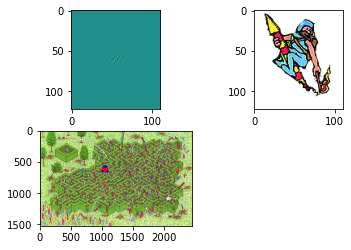

Offset_x_co =  1056.5 Offset_y_co =  614.5 value = 0.08147886735851918
Offset_x_co =  995 Offset_y_co =  559 value = 0.08147886735851918
run time =  0.9919431209564209


In [11]:
start = time.time()
image_cross, image_cross_value = find_offset( pattern_g1, template_g1)
end = time.time()

#function to find aimage centre
vertCen = pattern.shape[1]/2
horCen = pattern.shape[0]/2

#plot shift FFT of image
plt.subplot(2,2,1)
plt.imshow( np.fft.fftshift( np.imag(matrix_fft(pattern_g1)) ) ) 
plt.subplot(2,2,2)
plt.imshow( mpimg.imread( patternDir ) )   
plt.subplot(2,2,3)
plt.imshow( mpimg.imread( templateDir ) )  
circle=plt.Circle(( image_cross[1] + vertCen ,\
image_cross[0] + horCen  ),\
50,facecolor='red', edgecolor='blue',linestyle='dotted', \
linewidth='2.2')
plt.gca().add_patch(circle)  
plt.show()    
plt.ion()    

print("Offset_x_co = ", image_cross[1] + horCen , "Offset_y_co = ", image_cross[0] + vertCen, "value =", image_cross_value)
print("Offset_x_co = ", image_cross[1] , "Offset_y_co = ", image_cross[0] , "value =", image_cross_value)
print("run time = ", end - start )

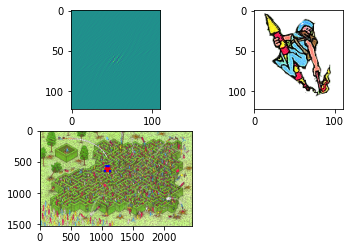

Offset_x_co =  1095.5 Offset_y_co =  608.5 value = 0.02099249410596583
Offset_x_co =  1034 Offset_y_co =  553 value = 0.02099249410596583
run time =  0.9969067573547363


In [12]:
start = time.time()
image_cross, image_cross_value = find_offset( pattern_s1, template_s1)
end = time.time()

#function to find aimage centre
vertCen = pattern.shape[1]/2
horCen = pattern.shape[0]/2

#plot shift FFT of image
plt.subplot(2,2,1)
plt.imshow( np.fft.fftshift( np.imag(matrix_fft(pattern_s1)) ) ) 
plt.subplot(2,2,2)
plt.imshow( mpimg.imread( patternDir ) )   
plt.subplot(2,2,3)
plt.imshow( mpimg.imread( templateDir ) )  
circle=plt.Circle(( image_cross[1] + vertCen ,\
image_cross[0] + horCen  ),\
50,facecolor='red', edgecolor='blue',linestyle='dotted', \
linewidth='2.2')
plt.gca().add_patch(circle)  
plt.show()    
plt.ion()    

print("Offset_x_co = ", image_cross[1] + horCen , "Offset_y_co = ", image_cross[0] + vertCen, "value =", image_cross_value)
print("Offset_x_co = ", image_cross[1] , "Offset_y_co = ", image_cross[0] , "value =", image_cross_value)
print("run time = ", end - start )

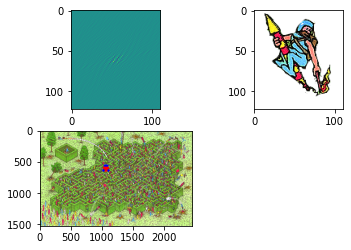

Offset_x_co =  1071.5 Offset_y_co =  599.5 value = 0.7523513729698346
Offset_x_co =  1010 Offset_y_co =  544 value = 0.7523513729698346
run time =  0.9888992309570312


In [13]:
start = time.time()
image_cross, image_cross_value = find_offset( pattern_g2, template_g2)
end = time.time()

#function to find aimage centre
vertCen = pattern.shape[1]/2
horCen = pattern.shape[0]/2

#plot shift FFT of image
plt.subplot(2,2,1)
plt.imshow( np.fft.fftshift( np.imag(matrix_fft(pattern_g2)) ) ) 
plt.subplot(2,2,2)
plt.imshow( mpimg.imread( patternDir ) )   
plt.subplot(2,2,3)
plt.imshow( mpimg.imread( templateDir ) )  
circle=plt.Circle(( image_cross[1] + vertCen ,\
image_cross[0] + horCen  ),\
50,facecolor='red', edgecolor='blue',linestyle='dotted', \
linewidth='2.2')
plt.gca().add_patch(circle)  
plt.show()    
plt.ion()    

print("Offset_x_co = ", image_cross[1] + horCen , "Offset_y_co = ", image_cross[0] + vertCen, "value =", image_cross_value)
print("Offset_x_co = ", image_cross[1] , "Offset_y_co = ", image_cross[0] , "value =", image_cross_value)
print("run time = ", end - start )

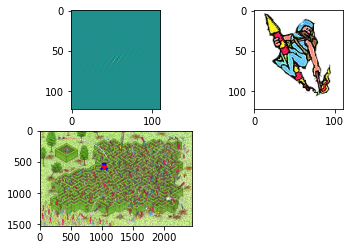

Offset_x_co =  1042.5 Offset_y_co =  574.5 value = 0.18427300254461487
Offset_x_co =  981 Offset_y_co =  519 value = 0.18427300254461487
run time =  0.9965424537658691


In [14]:
start = time.time()
image_cross, image_cross_value = find_offset( pattern_s2, template_s2)
end = time.time()

#function to find aimage centre
vertCen = pattern.shape[1]/2
horCen = pattern.shape[0]/2

#plot shift FFT of image
plt.subplot(2,2,1)
plt.imshow( np.fft.fftshift( np.imag(matrix_fft(pattern_s2)) ) ) 
plt.subplot(2,2,2)
plt.imshow( mpimg.imread( patternDir ) )   
plt.subplot(2,2,3)
plt.imshow( mpimg.imread( templateDir ) )  
circle=plt.Circle(( image_cross[1] + vertCen ,\
image_cross[0] + horCen  ),\
50,facecolor='red', edgecolor='blue',linestyle='dotted', \
linewidth='2.2')
plt.gca().add_patch(circle)  
plt.show()    
plt.ion()    

print("Offset_x_co = ", image_cross[1] + horCen , "Offset_y_co = ", image_cross[0] + vertCen, "value =", image_cross_value)
print("Offset_x_co = ", image_cross[1] , "Offset_y_co = ", image_cross[0] , "value =", image_cross_value)
print("run time = ", end - start )